# Laptop Price

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Importación de los datos

In [114]:
path = "/Users/ceciliaguillametchargue/Downloads/laptop_price.csv"
data = pd.read_csv(path, sep = ',', engine = 'python')

### Análisis descriptivo de los datos

In [3]:
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
data.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.0
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0
1302,1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.0


In [5]:
data.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [6]:
data.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [7]:
data.describe(include = "object")

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303
unique,19,618,6,40,118,9,39,110,9,179
top,Lenovo,XPS 13,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,297,30,727,507,190,619,412,281,1072,121


No hay valores faltantes

### Depuración de la base

In [115]:
temp = data["ScreenResolution"].str.split(" ") #Dividimos
data["Resol"] = temp.str.get(-1) #tomamos lo último de cada fila
resol = data["Resol"].str.split('x', expand = True)
data["Resol_x"] = resol[0]
data["Resol_y"] = resol[1]
data["Resol_x"] = pd.to_numeric(data["Resol_x"])
data["Resol_y"] = pd.to_numeric(data["Resol_y"])

cpu_temp = data["Cpu"].str.split(" ")
data["Cpu model"] = cpu_temp.str.get(-1)
data["Cpu brand"] = cpu_temp.str.get(0)
data["Processor"] = cpu_temp.str.get(0) + ' ' + cpu_temp.str.get(1) + ' ' + cpu_temp.str.get(2)

data["Cpu model"] = data["Cpu model"].replace('GHz','', regex = True) # Eliminamos el GB de la variable RAM
data["Cpu model"] = pd.to_numeric(data["Cpu model"]) # Convertimos a numérica
data.rename(columns = {'Cpu model': 'Cpu model (GHz)'}, inplace = True)

In [116]:
memory = data["Memory"].str.split(' ', 1, expand = True)
data["Memory"] = memory[0]
data["Memory type"] = memory[1]

In [117]:
data["Ram"] = data["Ram"].replace('GB','', regex = True) # Eliminamos el GB de la variable RAM
data["Ram"] = pd.to_numeric(data["Ram"]) # Convertimos a numérica
data.rename(columns = {'Ram': 'Ram (GB)'}, inplace = True)


data["Weight"] = data["Weight"].replace('kg','', regex = True) #Eliminamos el kg de la variable Weight
data["Weight"] = pd.to_numeric(data["Weight"]) # Convertimos a numérica
data.rename(columns = {'Weight': 'Weight (kg)'}, inplace = True)

In [118]:
gpu_temp = data["Gpu"].str.split(' ')
gpu_temp2 = list(gpu_temp)

gpu_temp3 = []
for i in gpu_temp2:
    gpu_temp3.append(' '.join(i[1:]))

data['Gpu brand'] = gpu_temp.str.get(0)
data['Gpu model'] = gpu_temp3

In [119]:
data["Memory"] = data["Memory"].replace('GB', '',regex = True)
data["Memory"] = data["Memory"].replace('TB', '',regex = True)

data["Memory"] = pd.to_numeric(data["Memory"])

data["Memory"] = data["Memory"].apply(lambda x: 1024 if x==1 else x)
data["Memory"] = data["Memory"].apply(lambda x: 2048 if x==2 else x)
data.rename(columns={"Memory":"Memory (GB)"}, inplace=True)

In [120]:
data.set_index('laptop_ID', inplace = True)
data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram (GB),Memory (GB),Gpu,OpSys,...,Price_euros,Resol,Resol_x,Resol_y,Cpu model (GHz),Cpu brand,Processor,Memory type,Gpu brand,Gpu model
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128.0,Intel Iris Plus Graphics 640,macOS,...,1339.69,2560x1600,2560,1600,2.3,Intel,Intel Core i5,SSD,Intel,Iris Plus Graphics 640
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128.0,Intel HD Graphics 6000,macOS,...,898.94,1440x900,1440,900,1.8,Intel,Intel Core i5,Flash Storage,Intel,HD Graphics 6000
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256.0,Intel HD Graphics 620,No OS,...,575.00,1920x1080,1920,1080,2.5,Intel,Intel Core i5,SSD,Intel,HD Graphics 620
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512.0,AMD Radeon Pro 455,macOS,...,2537.45,2880x1800,2880,1800,2.7,Intel,Intel Core i7,SSD,AMD,Radeon Pro 455
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256.0,Intel Iris Plus Graphics 650,macOS,...,1803.60,2560x1600,2560,1600,3.1,Intel,Intel Core i5,SSD,Intel,Iris Plus Graphics 650


In [121]:
data.dtypes

Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram (GB)              int64
Memory (GB)         float64
Gpu                  object
OpSys                object
Weight (kg)         float64
Price_euros         float64
Resol                object
Resol_x               int64
Resol_y               int64
Cpu model (GHz)     float64
Cpu brand            object
Processor            object
Memory type          object
Gpu brand            object
Gpu model            object
dtype: object

### Creación de variables dummy para las variables categóricas

In [122]:
dummy_var_2 = pd.get_dummies(data["Cpu brand"])
data = pd.concat([data, dummy_var_2], axis = 1)
dummy_var_4 = pd.get_dummies(data["Gpu brand"])
data = pd.concat([data, dummy_var_4], axis = 1)

### Visualizations

Text(0.5, 1.0, 'Precios en función de marcas')

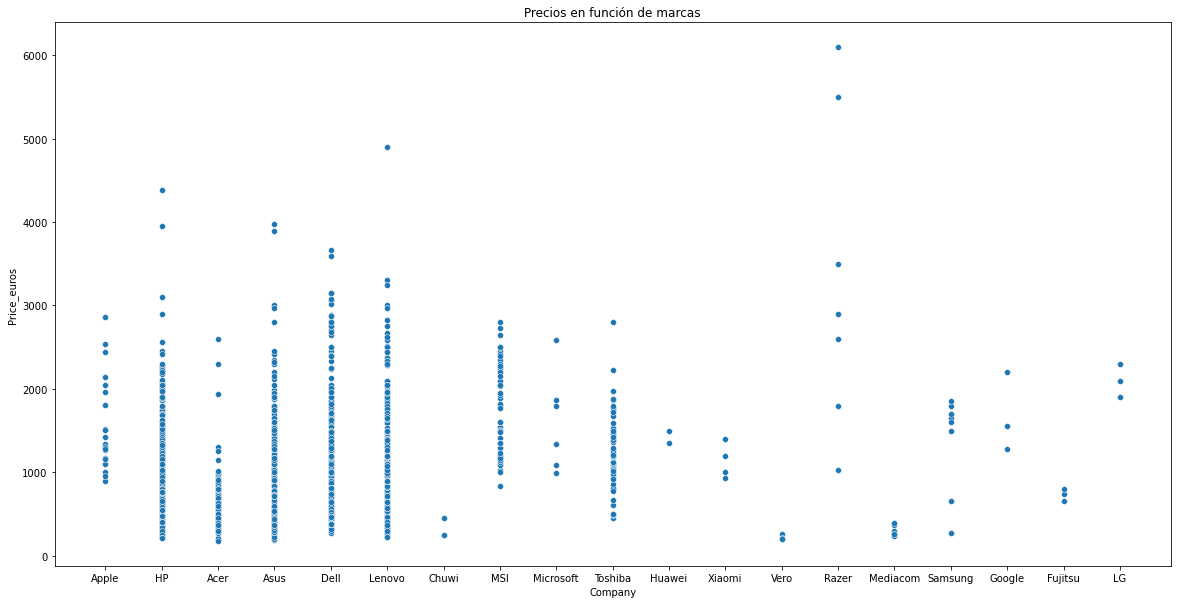

In [288]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(data = data, x = "Company", y = "Price_euros")
plt.title("Precios en función de marcas")

<AxesSubplot:xlabel='Company', ylabel='Price_euros'>

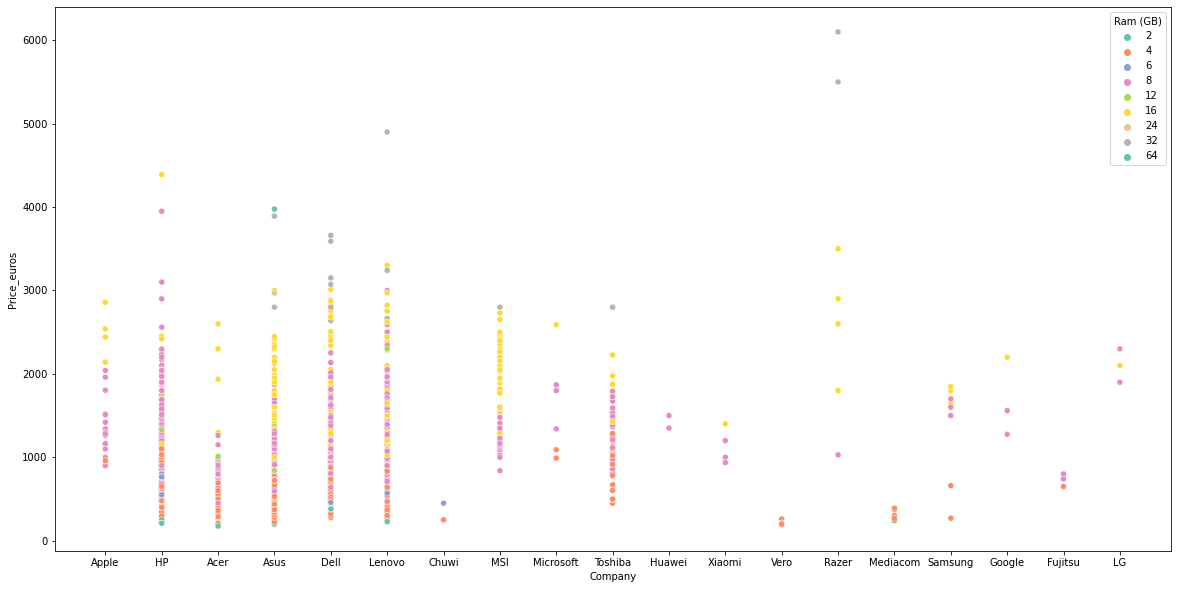

In [300]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(data = data, x = "Company", y = "Price_euros", hue = "Ram (GB)", palette = "Set2")

<AxesSubplot:xlabel='Price_euros', ylabel='Processor'>

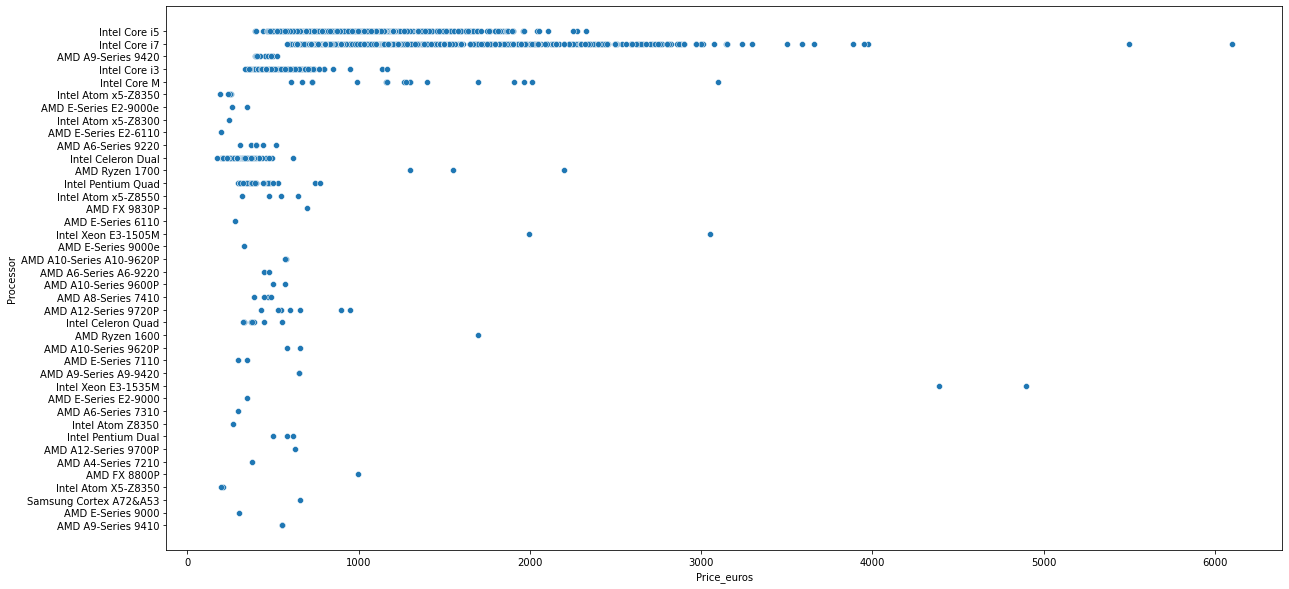

In [302]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(data = data, x = "Price_euros", y = "Processor")

<AxesSubplot:xlabel='Price_euros', ylabel='Processor'>

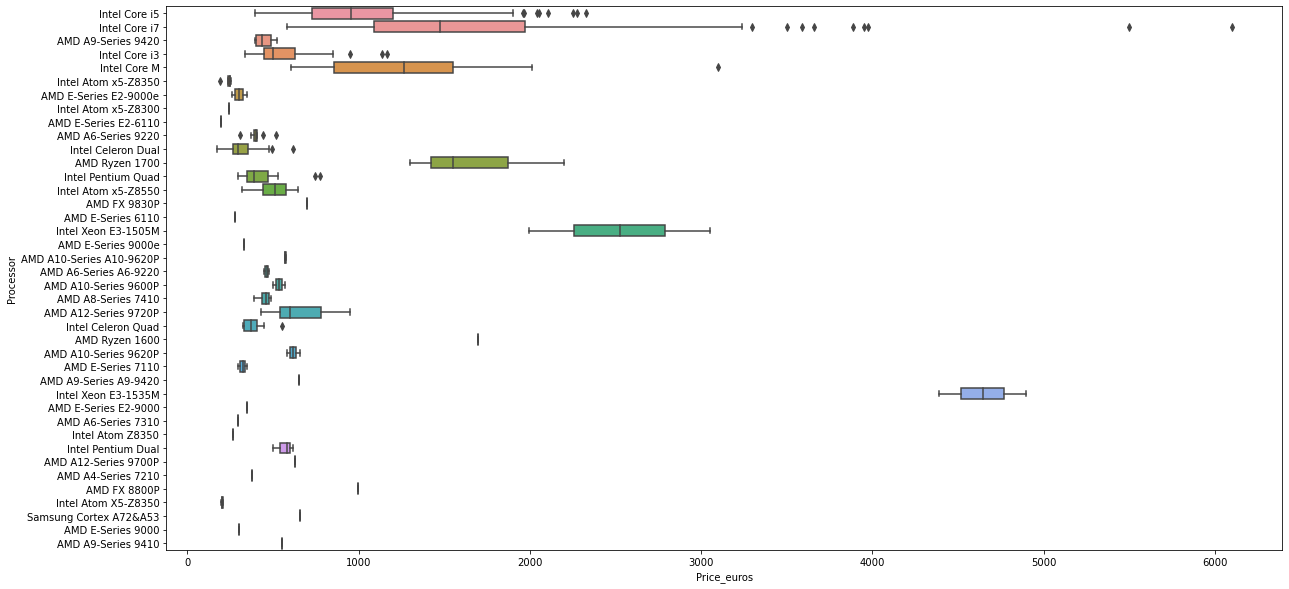

In [66]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x = "Price_euros", y = "Processor", data = data)

In [130]:
### Creando variables dummy para ciertas caterogirías que parecerían más influentes en el precio

data['Procesador_Intel Core i5'] = np.where(data["Processor"] == 'Intel Core i5', True, False)
data['Procesador_Intel Core i7'] = np.where(data["Processor"] == 'Intel Core i7', True, False)
data['Procesador_Intel Core M'] = np.where(data["Processor"] == 'Intel Core M', True, False)
data['Procesador_AMD Ryzen 1700'] = np.where(data["Processor"] == 'AMD Ryzen 1700', True, False)
data['Procesador_Intel Xeon E3-1505M'] = np.where(data["Processor"] == 'Intel Xeon E3-1505M', True, False)
data['Procesador_Intel Xeon E3-1535M'] = np.where(data["Processor"] == 'Intel Xeon E3-1535M', True, False)
data['Procesador_otros'] = np.where((data["Processor"] != 'Intel Core i5') & 
                                    (data["Processor"] != 'Intel Core i7') &
                                    (data["Processor"] != 'Intel Core M') &
                                    (data["Processor"] != 'AMD Ryzen 1700') &
                                    (data["Processor"] != 'Intel Xeon E3-1505M') &
                                    (data["Processor"] != 'Intel Xeon E3-1535M'), True, False)

#### Convirtiendo los booleanos en enteros

data['Procesador_Intel Core i5'] = data['Procesador_Intel Core i5'].astype(int)
data['Procesador_Intel Core i7'] = data['Procesador_Intel Core i7'].astype(int)
data['Procesador_Intel Core M'] = data['Procesador_Intel Core M'].astype(int)
data['Procesador_AMD Ryzen 1700'] = data['Procesador_AMD Ryzen 1700'].astype(int)
data['Procesador_Intel Xeon E3-1505M'] = data['Procesador_Intel Xeon E3-1505M'].astype(int)
data['Procesador_Intel Xeon E3-1535M'] = data['Procesador_Intel Xeon E3-1535M'].astype(int)
data['Procesador_otros'] = data['Procesador_otros'].astype(int)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram (GB),Memory (GB),Gpu,OpSys,...,ARM,Intel,Nvidia,Procesador_Intel Core i5,Procesador_Intel Core i7,Procesador_Intel Core M,Procesador_AMD Ryzen 1700,Procesador_Intel Xeon E3-1505M,Procesador_Intel Xeon E3-1535M,Procesador_otros
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128.0,Intel Iris Plus Graphics 640,macOS,...,0,1,0,1,0,0,0,0,0,0
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128.0,Intel HD Graphics 6000,macOS,...,0,1,0,1,0,0,0,0,0,0
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256.0,Intel HD Graphics 620,No OS,...,0,1,0,1,0,0,0,0,0,0
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512.0,AMD Radeon Pro 455,macOS,...,0,0,0,0,1,0,0,0,0,0
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256.0,Intel Iris Plus Graphics 650,macOS,...,0,1,0,1,0,0,0,0,0,0


<AxesSubplot:>

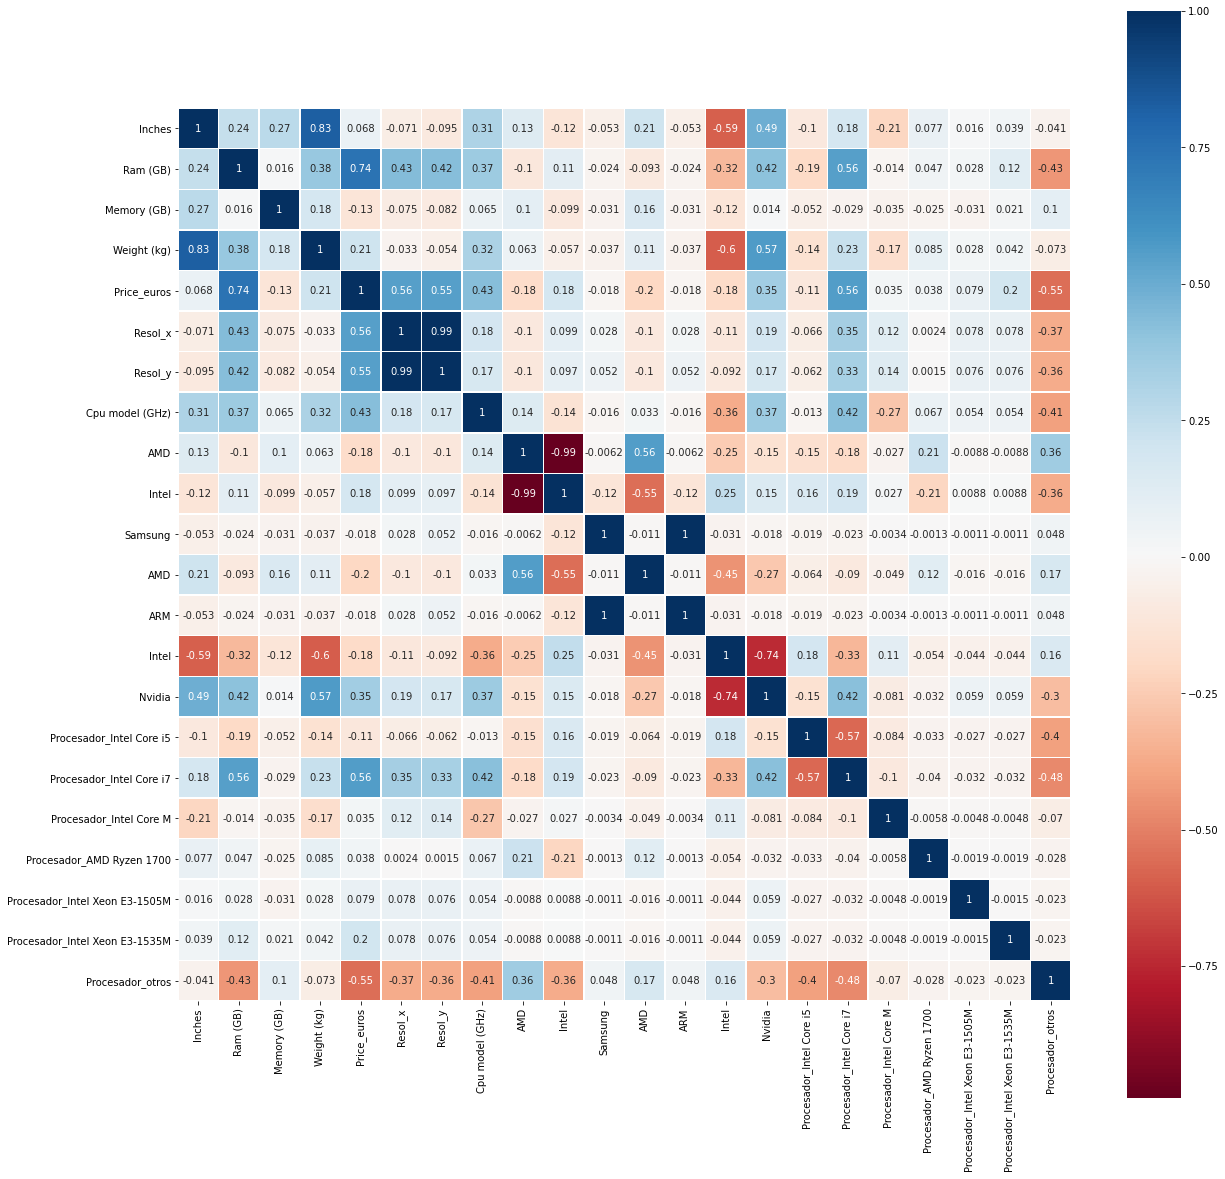

In [132]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(), square=True , annot= True, linewidths=.5, annot_kws ={"size" : 10}, cmap ='RdBu')

Se puede observer que el precio se encuentra principalmente correlacionado con la RAM (GB), con la resolución de la pantalla y con un procesador intel core i7. En menor medida con el modelo de la CPU. Se correlaciona en forma negativa con otro tipo de procesadores.

(0.0, 7836.661400613642)

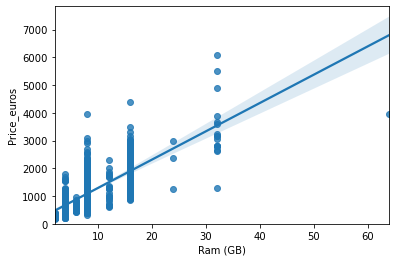

In [61]:
sns.regplot(x = "Ram (GB)", y = "Price_euros", data = data)
plt.ylim(0,)

In [62]:
data[["Price_euros", "Ram (GB)"]].corr() # Otra manera de ver cuál es la correlación entre ambas variables.

,Price_euros,Ram (GB)
Price_euros,1.000000,0.743007
Ram (GB),0.743007,1.000000
